# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


## 1. What test is appropriate for this problem? Does CLT apply?

In [5]:
# select required columns
df = data[["race", "call"]].copy()
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [6]:
# replace race categories with numbers
#df.loc[df.race == "b", "race"] = 0
#df.loc[df.race == "w", "race"] = 1

In [7]:
# create dataset for black and white people
df_b = df[df.race == "b"]["call"]
df_w = df[df.race == "w"]["call"]
len(df_w)

2435

### 1.1 What test is appropriate for this problem?

Two sample test.
- black people
* white people

### 2.1 Does CLT apply?

If we sample the data and calculate the mean over the new samples, we can see that CLT applys.

In [8]:
all_samples = []
for i in range(1, 5500):
    all_samples.append(df_b.sample(1000).mean())

/Users/floriansestak/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


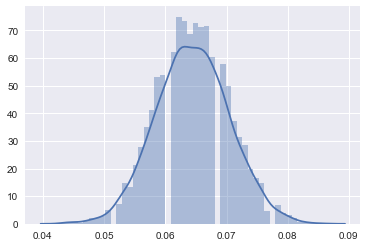

In [13]:
sns.distplot(all_samples)

## 2. What are the null and alternate hypotheses?

#### Null hypotheses
The race has no significant impact on the rate of callbacks for resumes. 
#### Alternate hypotheses
The race has significant impact on the rate of callbacks for resumes.

## 3. Compute margin of error, confidence interval, and p-value.

two sample test<br>
samples are independent

In [10]:
# H0: mü_1  = mü_2
# H1: mü_1 != mü_2
mü_1 = df_b.mean()
mü_2 = df_w.mean()

# significance level
a = 0.05

In [16]:
# calculate t- and p-value
t, p = stats.ttest_ind(df_w, df_b, equal_var=False)
print('p:', format(p, 'f'))
print('t:', format(t, 'f'))

p: 0.000039
t: 4.114705


The p value is smaller than our significance level, so we reject H0.

In [17]:
#c = stats.t.ppf(0.975)

## 4. Write a story describing the statistical significance in the context or the original problem.

5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?